In [5]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml("mnist_784") # 28*28 = 784

In [9]:
X, y = dataset["data"], dataset["target"]

In [10]:
X = X / 255 # broadcasting normalize
X.shape

(70000, 784)

In [11]:
y.shape

(70000,)

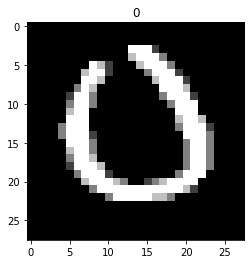

In [18]:
import matplotlib.pyplot as plt
i = 10010
img_1 = X[i,:].reshape(28,28)
plt.title(y[i])
plt.imshow(img_1, cmap="gray")

In [19]:
import numpy as np

y_new = np.zeros(y.shape)
y_new[np.where(y == 0.0)[0]] = 1
y = y_new

In [21]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
y_train, y_test = y[:m].reshape(1,m), y[m:].reshape(1,m_test)

In [22]:
np.random.seed(138)
shuffle_index = np.random.permutation(m)
X_train, y_train, = X_train[:, shuffle_index], y_train[:, shuffle_index]

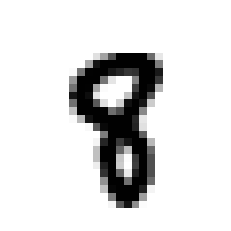

[0.]


In [24]:
%matplotlib inline
import matplotlib

i = 3
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[:,i])

In [32]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s


epsilon = 1e-10
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat + epsilon),Y) ) + np.sum( np.multiply(np.log(1-Y_hat + epsilon),(1-Y)) ) )

    return L

In [33]:
learning_rate = 1

X = X_train
Y = y_train

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1, 1))

for i in range(2000):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)

    cost = compute_loss(Y, A)

    dW = (1/m) * np.matmul(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y, axis=1, keepdims=True)

    W = W - learning_rate * dW
    b = b - learning_rate * db

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  0.6678661596269068
Epoch 100 cost:  1.7841663353447073e-05
Epoch 200 cost:  1.752882628186624e-05
Epoch 300 cost:  1.722758627839981e-05
Epoch 400 cost:  1.693729316051088e-05
Epoch 500 cost:  1.6657345082766097e-05
Epoch 600 cost:  1.638718409365741e-05
Epoch 700 cost:  1.61262921759848e-05
Epoch 800 cost:  1.5874187710296163e-05
Epoch 900 cost:  1.563042230939896e-05
Epoch 1000 cost:  1.5394577979159262e-05
Epoch 1100 cost:  1.5166264566883965e-05
Epoch 1200 cost:  1.4945117463750076e-05
Epoch 1300 cost:  1.4730795532164644e-05
Epoch 1400 cost:  1.4522979232685162e-05
Epoch 1500 cost:  1.4321368928368333e-05
Epoch 1600 cost:  1.4125683347174271e-05
Epoch 1700 cost:  1.3935658185446952e-05
Epoch 1800 cost:  1.3751044837545893e-05
Epoch 1900 cost:  1.3571609238484039e-05
Final cost: 1.339885174739616e-05


In [36]:
y_test[0,100] = 1.0

In [37]:
from sklearn.metrics import classification_report, confusion_matrix

Z = np.matmul(W.T, X_test) + b
A = sigmoid(Z)

predictions = (A>.5)[0,:]
labels = (y_test == 1)[0,:]

print(confusion_matrix(predictions, labels))

[[9999    1]
 [   0    0]]


In [ ]:
"""
     T      F
T [[9999    1]           
F  [   0    0]]              
"""

In [38]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     10000
        True       0.00      0.00      0.00         0

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



C:\Users\goksut\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
